# Well Stratigraphic Forward Modeling

This notebook shows how to use pyWellSFM to simulate the deposits along a well.

Import modules

In [1]:
import os
import sys

root_path = os.path.dirname(os.getcwd())
package_path = os.path.join(root_path, "src")
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import matplotlib.pyplot as plt

from pywellsfm import (
    AccumulationModel,
    AccumulationModelElementEnvironmentOptimum,
    AccumulationModelElementGaussian,
    AccumulationCurve,
    Curve,
    Element,
    Facies,
    FaciesCriteria,
    FaciesCriteriaType,
    FaciesModel,
    FSSimulatorRunner,
    FSSimulatorRunnerData,
    Scenario,
    SubsidenceType,
    RealizationData,
    Well
)
from pywellsfm.io import loadSimulationData

## 1. Run simulation from simulation file

Data file is `simulation.json`, located in `tests/data`.

### Load data

In [2]:
# Load the simulation data from the JSON file
simulation_filepath = os.path.join(root_path, "tests/data/simulation.json")
simulationData: FSSimulatorRunnerData = loadSimulationData(simulation_filepath)

print("Loaded simulation data:")
print(f"Scenario name: {simulationData.scenario.name}")
print(f"Number of realizations: {len(simulationData.realizationDataList)}")
print(f"Well names: {[rd.well.name for rd in simulationData.realizationDataList]}")

Interpolation method set to 'linear' by default
{'format': 'pyWellSFM.CurveData', 'version': '1.0', 'curve': {'xAxisName': 'Age', 'yAxisName': 'Subsidence', 'interpolationMethod': 'linear', 'data': [{'x': 0.0, 'y': 25.0}, {'x': 10.0, 'y': 25.0}, {'x': 20.0, 'y': 15.0}, {'x': 30.0, 'y': 10.0}]}}
{'format': 'pyWellSFM.CurveData', 'version': '1.0', 'curve': {'xAxisName': 'Age', 'yAxisName': 'Subsidence', 'interpolationMethod': 'linear', 'data': [{'x': 0.0, 'y': 20.0}, {'x': 10.0, 'y': 20.0}, {'x': 20.0, 'y': 15.0}, {'x': 30.0, 'y': 5.0}]}}
Loaded simulation data:
Scenario name: Scenario1
Number of realizations: 2
Well names: ['Well1', 'Well2']


### Create the simulator runner with default parameters and run the simulation


In [3]:
simulator = FSSimulatorRunner(
    simulationData.scenario,
    simulationData.realizationDataList,
    max_bathymetry_change_per_step=0.5,
    dt_min=0.001,
    dt_max=0.1,
    safety=0.9,
    max_steps=int(1e9)
)

simulator.prepare()
simulator.run()
simulator.finalize()

Running time step at age 30.0000 over 10.0000 Myr...
Running time step at age 29.9493 over 10.0000 Myr...
Running time step at age 29.8593 over 10.0000 Myr...
Running time step at age 29.7693 over 10.0000 Myr...
Running time step at age 29.6793 over 10.0000 Myr...
Running time step at age 29.5893 over 10.0000 Myr...
Running time step at age 29.4993 over 10.0000 Myr...
Running time step at age 29.4093 over 10.0000 Myr...
Running time step at age 29.3193 over 10.0000 Myr...
Running time step at age 29.2293 over 10.0000 Myr...
Running time step at age 29.1393 over 10.0000 Myr...
Running time step at age 29.0493 over 10.0000 Myr...
Running time step at age 28.9593 over 10.0000 Myr...
Running time step at age 28.8693 over 10.0000 Myr...
Running time step at age 28.7793 over 10.0000 Myr...
Running time step at age 28.6893 over 10.0000 Myr...
Running time step at age 28.5993 over 10.0000 Myr...
Running time step at age 28.5093 over 10.0000 Myr...
Running time step at age 28.4193 over 10.0000 

### Plot results

Well 1

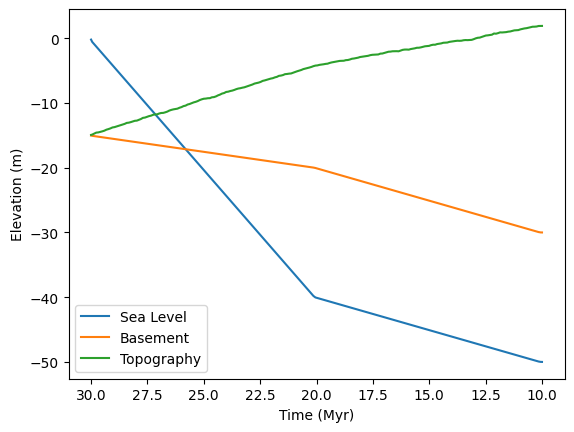

In [4]:
ds = simulator.outputs
assert ds is not None, "Simulator outputs should not be None after finalization."

i = 0  # realization index
t = ds["time"].values
sea = ds["sea_level"].values
base = ds["basement"].isel(realization=i).values
topo = base + ds["thickness_cumul"].isel(realization=i).values

plt.figure()
plt.plot(t, sea, label="Sea Level")
plt.plot(t, base, label="Basement")
plt.plot(t, topo, label="Topography")

plt.gca().invert_xaxis()  # reverse x-axis to show time going from past to present
plt.xlabel("Time (Myr)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.show()

Well 2

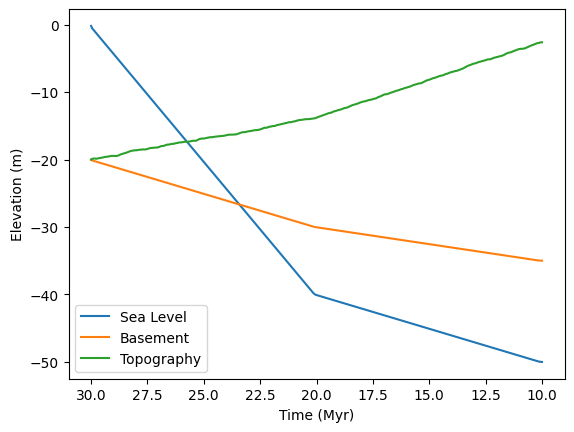

In [5]:
ds = simulator.outputs
assert ds is not None, "Simulator outputs should not be None after finalization."

i = 1  # realization index
t = ds["time"].values
sea = ds["sea_level"].values
base = ds["basement"].isel(realization=i).values
topo = base + ds["thickness_cumul"].isel(realization=i).values

plt.figure()
plt.plot(t, sea, label="Sea Level")
plt.plot(t, base, label="Basement")
plt.plot(t, topo, label="Topography")

plt.gca().invert_xaxis()  # reverse x-axis to show time going from past to present
plt.xlabel("Time (Myr)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.show()

## Run simulation from objects

Carbonate platform

In [ ]:
# --- create scenario object ---

# creation Facies Model
faciesList = {
    Facies("Facies A", FaciesCriteria("", 0, 10, FaciesCriteriaType.SEDIMENTOLOGICAL)),
    Facies("Facies B", FaciesCriteria("", 10, 20, FaciesCriteriaType.SEDIMENTOLOGICAL)),
    Facies("Facies C", FaciesCriteria("", 20, 30, FaciesCriteriaType.SEDIMENTOLOGICAL)),
}
faciesModel = FaciesModel(faciesList)

# create accumulation model
bathys = np.array([0, 10.0, 50.0, 100.0])  # bathymetry in meters

# First element: 
accumCurves1 = {
    "Bathymetry": AccumulationCurve(
        "Accumulation Curve",
        bathys,
        np.array([1.0, 0.0, 0.0, 0.0])
    )
}

# Second element: 
accumCurves2 = {
    "Bathymetry": AccumulationCurve(
        "Accumulation Curve",
        bathys,
        np.array([0.0, 1.0, 0.0, 0.0])
    )
}

# Third element: 
accumCurves3 = {
    "Bathymetry": AccumulationCurve(
        "Accumulation Curve",
        bathys,
        np.array([0.0, 0.0, 1.0, 0.0])
    )
}

# Whole model with all elements
elementsAccuModel = {
    "Element 1": AccumulationModelElementEnvironmentOptimum("Element 1", 1.0, accumCurves1),
    "Element 2": AccumulationModelElementEnvironmentOptimum("Element 2", 2.0, accumCurves2),
    "Element 3": AccumulationModelElementEnvironmentOptimum("Element 3", 3.0, accumCurves3),
    "Element 4": AccumulationModelElementGaussian("Element 4", 0.1, 0.05), # background sedimentation
}
accumulationModel = AccumulationModel(
    "Accumulation Model", elementsAccuModel
)

# create eustatic curve
times = np.array([0, 1, 2, 3, 4, 5])  # time in Myr
seaLevel = np.array([0, -10, -20, -15, -5, 0])  # sea level in meters
eustaticCurve = Curve("Age", "Eustatic Curve", times, seaLevel)

scenario = Scenario("Simulation", accumulationModel, eustaticCurve, faciesModel)

# --- create realization data ---

# create Well object
well = Well("Well_1", np.array([0.0, 0.0, 0.0]), 100.0)  # name, well location (x, y, z), and depth

# create subsidence curve, based on subsidence rates m/Myr
subs_curve = Curve("Age", "Subsidence Curve", times, np.array([0, 1, 2, 0.5, 0.1]))  # example subsidence curve

# initial bathymetry (m) at the well location
initialBathymetry = 10.0

realData = RealizationData(well, initialBathymetry, subs_curve, SubsidenceType.RATE)

realizationDataList = [realData]

print("Simulation data created:")
print(f"Scenario name: {scenario.name}")
print(f"Number of realizations: {len(realizationDataList)}")
print(f"Well names: {[rd.well.name for rd in realizationDataList]}")

#### Create SFM simulator and run simulation

In [ ]:
# create FSSimulatorRunner
simulator = FSSimulatorRunner(
    scenario,
    [realData],  # list of RealizationData objects
    max_bathymetry_change_per_step=0.5,
    dt_min=0.001,
    dt_max=0.1,
    safety=0.9,
    max_steps=int(1e9)
)

simulator.prepare()
simulator.run()
simulator.finalize()

#### Plot results

In [ ]:
ds = simulator.outputs
assert ds is not None, "Simulator outputs should not be None after finalization."

i = 0  # realization index
t = ds["time"].values
sea = ds["sea_level"].values
base = ds["basement"].isel(realization=i).values
topo = base + ds["thickness_cumul"].isel(realization=i).values

plt.figure()
plt.plot(t, sea, label="Sea Level")
plt.plot(t, base, label="Basement")
plt.plot(t, topo, label="Topography")

plt.gca().invert_xaxis()  # reverse x-axis to show time going from past to present
plt.xlabel("Time (Myr)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.show()